In [7]:
import kagglehub
kmader_food41_path = kagglehub.dataset_download('kmader/food41')

print('Data source import complete.')

Data source import complete.


In [8]:
import keras
keras.__version__

'3.8.0'

In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [10]:
!pip install tensorflowjs

In [11]:
import matplotlib.pyplot as plt
import kagglehub
import os
import shutil
import pandas as pd
import seaborn as sn
import numpy as np

import tensorflowjs as tfjs

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Input, Flatten, AveragePooling2D
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
# Download dataset Food-101 (food41)
path = kagglehub.dataset_download("kmader/food41")

# Path ke folder utama dataset
dataset_path = os.path.join(path, "images")

In [13]:
print("Dataset disimpan di:", path)

Dataset disimpan di: /kaggle/input/food41


In [14]:
print(os.listdir("/kaggle/input/food41/images"))

['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'chu

In [15]:
values = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'cheese_plate', 'cheesecake', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'foie_gras', 'french_fries', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'seaweed_salad', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']
directories = os.listdir('/kaggle/input/food41/images')
new_directory = 'new_images'
for directory in directories:
  if directory in values:
    shutil.copytree(os.path.join(dataset_path, directory), os.path.join(new_directory, directory))

# values.sort()
# values = values[0:]
# print(values)

In [16]:
print("Number of classes:", len(os.listdir('/kaggle/working/new_images')))

Number of classes: 90


In [17]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = len(os.listdir('/kaggle/working/new_images'))
EPOCHS = 15

In [19]:
# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # using 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [20]:
# Flow from directory
train_data = train_datagen.flow_from_directory(
    '/kaggle/working/new_images',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    '/kaggle/working/new_images',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    '/kaggle/working/new_images',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 72000 images belonging to 90 classes.
Found 18000 images belonging to 90 classes.
Found 90000 images belonging to 90 classes.


In [21]:
# Create the base model from MobileNetV2
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

I0000 00:00:1748659404.320836      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748659404.321617      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
# Freeze the base model
base_model.trainable = False

In [23]:
# Create new model on top
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)  # Regularization
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [24]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

In [26]:
# Train the model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1748659414.741192     132 service.cc:148] XLA service 0x785f88111d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748659414.742153     132 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748659414.742176     132 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748659415.692866     132 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2250 ━━━━━━━━━━━━━━━━━━━━ 7:37:26 12s/step - accuracy: 0.0312 - loss: 4.8413

I0000 00:00:1748659420.482315     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 992s 436ms/step - accuracy: 0.1360 - loss: 3.9247 - val_accuracy: 0.4143 - val_loss: 2.5002
Epoch 2/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 966s 429ms/step - accuracy: 0.3989 - loss: 2.4665 - val_accuracy: 0.4746 - val_loss: 2.1574
Epoch 3/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 973s 433ms/step - accuracy: 0.4593 - loss: 2.1785 - val_accuracy: 0.4978 - val_loss: 2.0330
Epoch 4/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 959s 426ms/step - accuracy: 0.4857 - loss: 2.0284 - val_accuracy: 0.5163 - val_loss: 1.9365
Epoch 5/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 961s 427ms/step - accuracy: 0.5036 - loss: 1.9510 - val_accuracy: 0.5294 - val_loss: 1.8875
Epoch 6/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 979s 435ms/step - accuracy: 0.5169 - loss: 1.8998 - val_accuracy: 0.5327 - val_loss: 1.8570
Epoch 7/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 956s 425ms/step - accuracy: 0.5311 - loss: 1.8459 - val_accuracy: 0.5374 - val_loss: 1.8335
Epoch 8/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 962s 428ms/step - accuracy: 0.5

In [27]:
# Evaluation
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 197s 70ms/step - accuracy: 0.5866 - loss: 1.6092

Test Accuracy: 61.90%
Test Loss: 1.4805


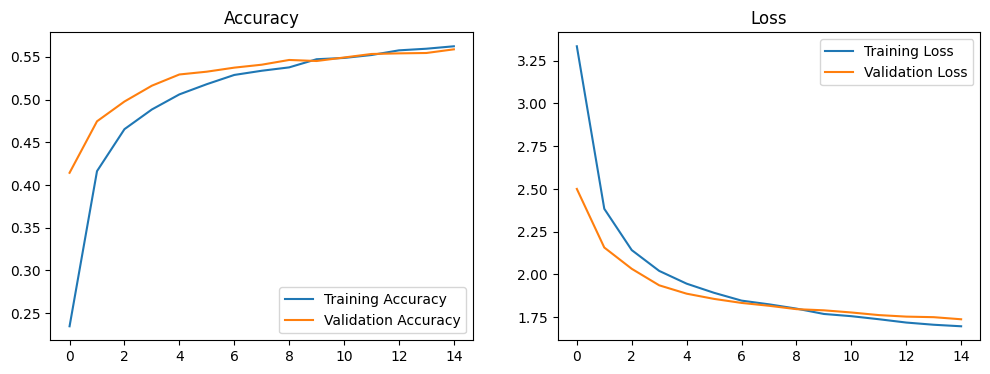

In [28]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [29]:
# Fine-tuning (unfreeze some layers)
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100

In [30]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [31]:
# Recompile the model for fine-tuning
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.00001),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
# Continue training
fine_tune_epochs = 10
total_epochs = EPOCHS + fine_tune_epochs

history_fine = model.fit(
    train_data,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_data,
    callbacks=callbacks
)

Epoch 15/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1000s 434ms/step - accuracy: 0.4600 - loss: 2.1792 - val_accuracy: 0.5792 - val_loss: 1.6483
Epoch 16/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 974s 433ms/step - accuracy: 0.5784 - loss: 1.6212 - val_accuracy: 0.6082 - val_loss: 1.5238
Epoch 17/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 971s 432ms/step - accuracy: 0.6138 - loss: 1.4790 - val_accuracy: 0.6222 - val_loss: 1.4540
Epoch 18/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 973s 432ms/step - accuracy: 0.6333 - loss: 1.3829 - val_accuracy: 0.6403 - val_loss: 1.3812
Epoch 19/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 972s 432ms/step - accuracy: 0.6532 - loss: 1.3142 - val_accuracy: 0.6526 - val_loss: 1.3395
Epoch 20/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 974s 433ms/step - accuracy: 0.6704 - loss: 1.2402 - val_accuracy: 0.6564 - val_loss: 1.3036
Epoch 21/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 971s 432ms/step - accuracy: 0.6769 - loss: 1.1981 - val_accuracy: 0.6674 - val_loss: 1.2744
Epoch 22/25
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 971s 432ms/

In [33]:
# Final evaluation
test_loss, test_acc = model.evaluate(test_data)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 193s 69ms/step - accuracy: 0.7489 - loss: 0.9200

Final Test Accuracy: 76.57%
Final Test Loss: 0.8581


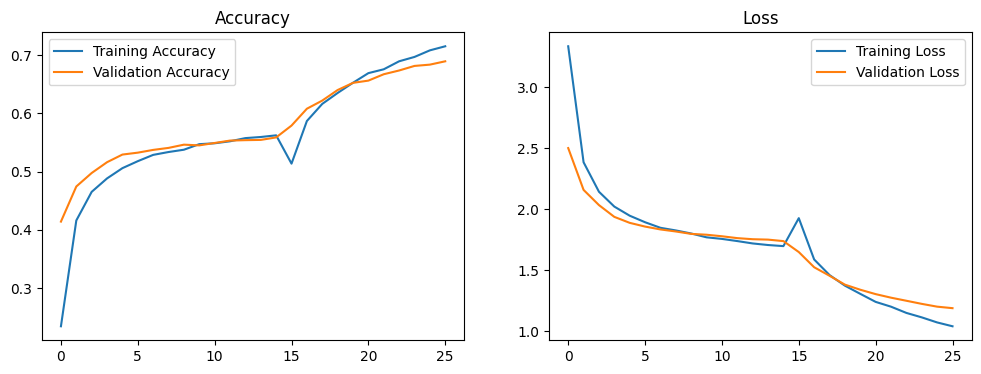

In [34]:
# Plot fine-tuning history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [35]:
# Save the final model
model.save('food101_mobilenetv2_final.h5')
model.save('food101_mobilenetv2_final.keras')